In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn .metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('HR_analytics.csv')

In [49]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [50]:
df.shape

(1470, 35)

In [51]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [53]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [54]:
import seaborn as sns

<AxesSubplot:>

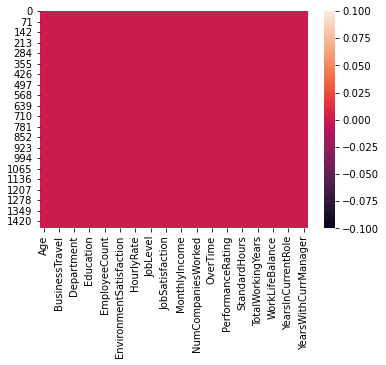

In [55]:
# so there are no null values ,even we can see in heatmap as well
sns.heatmap(df.isnull())

In [56]:
#we can see that our target variable is not showing in heatmap.it is happening because we have a string values in attrition column
#we need to label encode first

In [57]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [58]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [59]:
df['Department']=le.fit_transform(df['Department'])

In [60]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [61]:
df['Gender']=le.fit_transform(df['Gender'])

In [62]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [63]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [64]:
df['Over18']=le.fit_transform(df['Over18'])

In [65]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [66]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [67]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

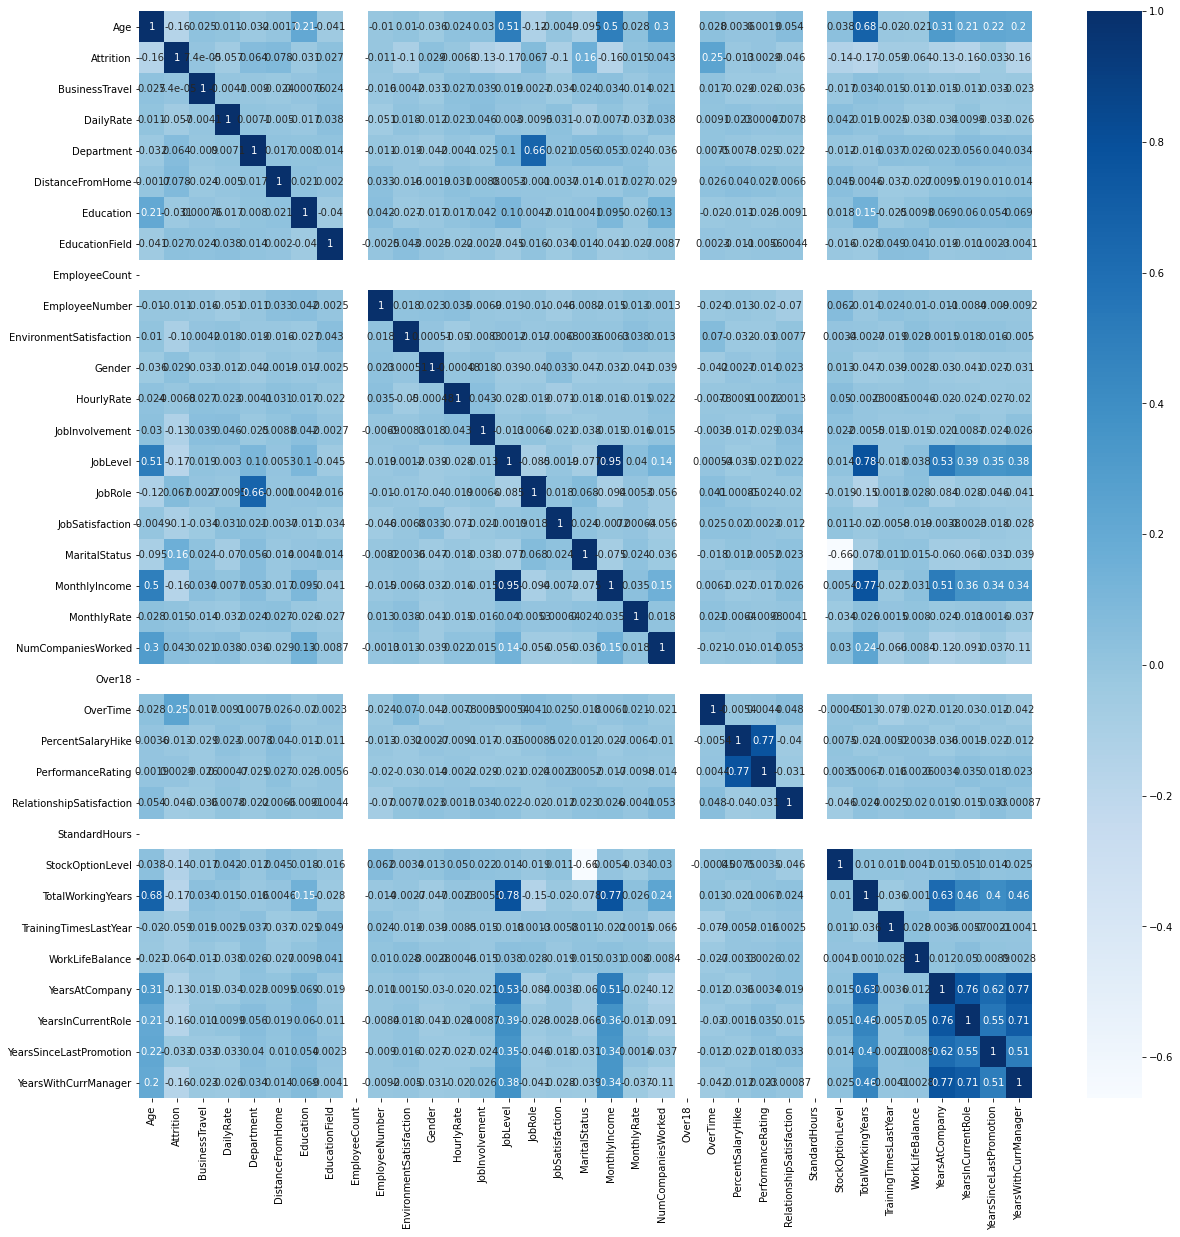

In [68]:
fig=plt.figure(figsize=(20,20))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

In [69]:
#because of the many columns we didnt see clearly but we under that there not many hight correlated values much more


<AxesSubplot:>

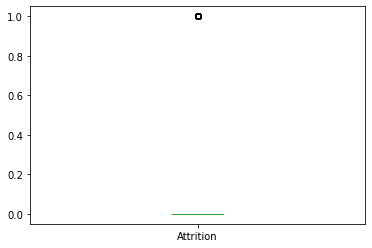

In [70]:
df['Attrition'].plot.box()

Age                            AxesSubplot(0.125,0.749828;0.065678x0.130172)
Attrition                   AxesSubplot(0.203814,0.749828;0.065678x0.130172)
BusinessTravel              AxesSubplot(0.282627,0.749828;0.065678x0.130172)
DailyRate                   AxesSubplot(0.361441,0.749828;0.065678x0.130172)
Department                  AxesSubplot(0.440254,0.749828;0.065678x0.130172)
DistanceFromHome            AxesSubplot(0.519068,0.749828;0.065678x0.130172)
Education                   AxesSubplot(0.597881,0.749828;0.065678x0.130172)
EducationField              AxesSubplot(0.676695,0.749828;0.065678x0.130172)
EmployeeCount               AxesSubplot(0.755508,0.749828;0.065678x0.130172)
EmployeeNumber              AxesSubplot(0.834322,0.749828;0.065678x0.130172)
EnvironmentSatisfaction        AxesSubplot(0.125,0.593621;0.065678x0.130172)
Gender                      AxesSubplot(0.203814,0.593621;0.065678x0.130172)
HourlyRate                  AxesSubplot(0.282627,0.593621;0.065678x0.130172)

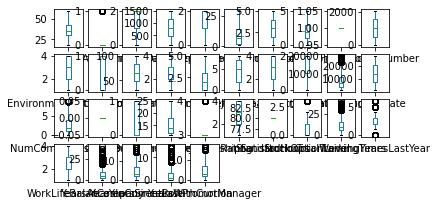

In [71]:
df.plot(kind='box',subplots=True,layout=(5,10))

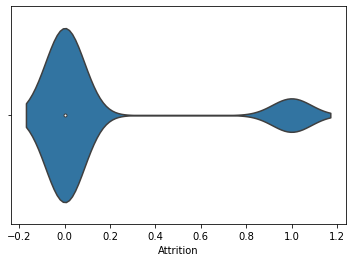

In [72]:
#univariate analysis
sns.violinplot(x="Attrition",data=df)
plt.show()

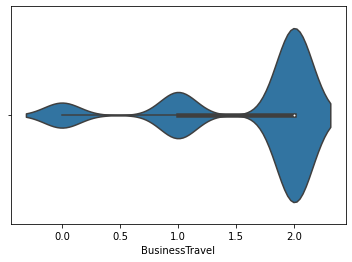

In [73]:
sns.violinplot(x="BusinessTravel",data=df)
plt.show()

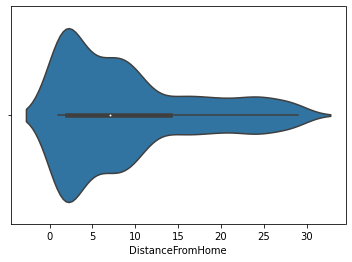

In [74]:
sns.violinplot(x="DistanceFromHome",data=df)
plt.show()

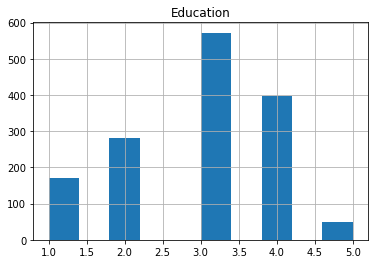

In [75]:
df["Education"].hist(grid=True)
plt.title("Education")
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

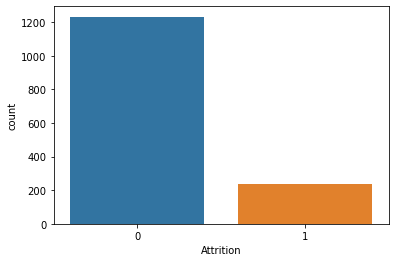

In [76]:
#bivariate analysis
sns.countplot(df['Attrition'])

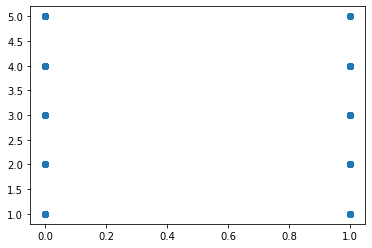

In [77]:
plt.scatter(df['Attrition'],df['Education'])
plt.show()

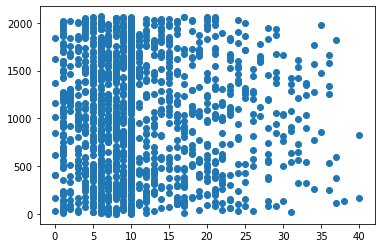

In [78]:
plt.scatter(df['TotalWorkingYears'],df['EmployeeNumber'])
plt.show()

In [79]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [80]:
#here we can analysis that there is not much skewness present in the dataset,so we dont need to remove skewness

In [81]:
from scipy .stats import zscore
zscr=np.abs(zscore(df))

In [82]:
zscr

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [83]:
x=df.drop(columns=['Attrition'])
y=df[['Attrition']]

In [84]:
x.shape

(1470, 34)

In [85]:
y.shape

(1470, 1)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=150)

In [87]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.808641975308642
[[262   1]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       263
           1       0.00      0.00      0.00        61

    accuracy                           0.81       324
   macro avg       0.41      0.50      0.45       324
weighted avg       0.66      0.81      0.73       324



In [88]:
print(x_train.shape)

(1146, 34)


In [89]:
print(x_test.shape)

(324, 34)


In [90]:
print(y_train.shape)

(1146, 1)


In [91]:
print(y_test.shape)

(324, 1)


In [92]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.7592592592592593
[[210  53]
 [ 25  36]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       263
           1       0.40      0.59      0.48        61

    accuracy                           0.76       324
   macro avg       0.65      0.69      0.66       324
weighted avg       0.80      0.76      0.77       324



In [94]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8240740740740741
[[260   3]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       263
           1       0.70      0.11      0.20        61

    accuracy                           0.82       324
   macro avg       0.76      0.55      0.55       324
weighted avg       0.80      0.82      0.77       324



In [101]:
from sklearn.svm import SVC

In [103]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8117283950617284
[[263   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       263
           1       0.00      0.00      0.00        61

    accuracy                           0.81       324
   macro avg       0.41      0.50      0.45       324
weighted avg       0.66      0.81      0.73       324



In [105]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817


In [106]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.85034014 0.85714286 0.86054422 0.8537415  0.85714286]
0.85578231292517


In [107]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.84013605 0.78231293 0.7585034  0.78231293 0.82312925]
0.7972789115646259


In [108]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())

[0.84013605 0.84013605 0.84693878 0.84013605 0.84013605]
0.8414965986394558


In [109]:
#so here we assume that there is not much diffrence in model and cross validation so all the model are working perfectly
#randomforest is working good

In [113]:
joblib.dump(rf,"rfmodel.obj")

['rfmodel.obj']